In [84]:
from math import sqrt
import matplotlib.pyplot as plt
import random

In [85]:
def mean(values):
  return sum(values) / float(len(values))

In [86]:
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

In [87]:
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

In [88]:
def coefficients(dataset):
      x = [row[0] for row in dataset]
      y = [row[1] for row in dataset]
      x_mean, y_mean = mean(x), mean(y)
      b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
      b0 = y_mean - b1 * x_mean
      return [b0, b1]

In [89]:
def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
  return predictions

In [90]:
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

In [91]:
def evaluate_algorithm(train_dataset, test_dataset, algorithm):
  predicted = algorithm(train_dataset, test_dataset)
  actual = [row[-1] for row in test_dataset]
  rmse = rmse_metric(actual, predicted)
  return rmse

In [92]:
def load_csv(file):
    x = []
    y = []
    for line in file:
        x.append(float(line.split(',')[0]))
        y.append(float(line.split(',')[1]))
    return (x, y)

In [93]:
x, y = load_csv(open('insurance.csv'))

In [94]:
insuranceDs = [[x[i], y[i]] for i in range(len(x))]

In [95]:
def split_train_test(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [96]:
trainSet, testSet = split_train_test(insuranceDs, 0.6)

In [97]:
predicted = simple_linear_regression(trainSet, testSet)

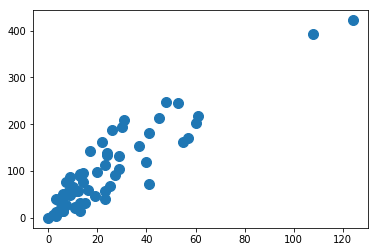

In [98]:
plt.scatter(x, y, alpha = 1, s = 100)
plt.show()

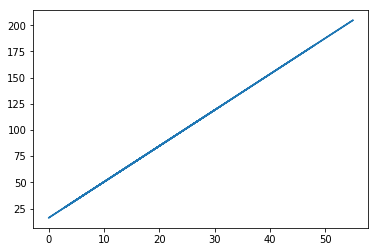

In [99]:
xForTestSet = [testSet[i][0] for i in range(len(testSet))]

plt.plot(xForTestSet, predicted)
plt.show()

In [100]:
rmse = evaluate_algorithm(trainSet, testSet, simple_linear_regression)
print('RMSE Metric for SimpleLinearRegression = {0}'.format(rmse))

RMSE Metric for SimpleLinearRegression = 44.14896022843808


In [109]:
def baseline_linear_regression(train, test):
  predictions = list()
  for row in test:
    yTrain = [train[i][-1] for i in range(len(train))]
    ypred = mean(yTrain) * row[0]
    predictions.append(ypred)
  return predictions

In [110]:
predicted = baseline_linear_regression(trainSet, testSet)

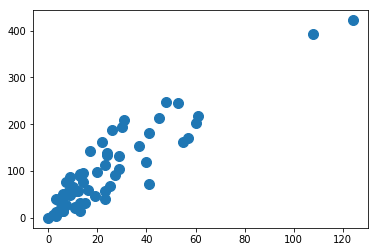

In [111]:
plt.scatter(x, y, alpha = 1, s = 100)
plt.show()

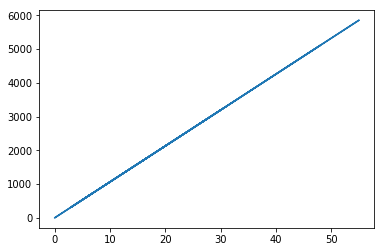

In [112]:
plt.plot(xForTestSet, predicted)
plt.show()

In [113]:
rmse = evaluate_algorithm(trainSet, testSet, baseline_linear_regression)
print('RMSE Metric for BaseLineLinearRegression = {0}'.format(rmse))

RMSE Metric for BaseLineLinearRegression = 2401.892645483708
